# Nike Product Analysis
## By: Risdan Kristori

## Part 1: Importing Libraries and Data

In [96]:
# importing libraries to process data
import pandas as pd
import numpy as np

# import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing data location
import missingno as msno

# import library to create wordcloud
from wordcloud import WordCloud, STOPWORDS

In [97]:
# open data
nike = pd.read_csv('nike_data_2022_09.csv', index_col='index')
nike.head(5)

,url,name,sub_title,brand,model,color,price,currency,availability,description,raw_description,avg_rating,review_count,images,available_sizes,uniq_id,scraped_at
index,,,,,,,,,,,,,,,,,
0,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,Nike,14226571,Navy,40.00,USD,InStock,SWEAT-WICKING COMFORT.The Nike Dri-FIT Team (M...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,S | M | L | XL | 2XL,c3229e54-aa58-5fdd-9f71-fbe66366b2b2,20/09/2022 23:32:28
1,https://www.nike.com/t/club-américa-womens-dri...,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,Nike,13814665,Black/Black,90.00,USD,InStock,"Inspired by traditional soccer jerseys, the Cl...","<div class=""pi-pdpmainbody""><br/><p>Inspired b...",5.0,1.0,https://static.nike.com/a/images/t_PDP_1280_v1...,L (12–14),f8ebb2ed-17ae-5719-b750-5ea3ec69b75c,20/09/2022 23:32:40
2,https://www.nike.com/t/sportswear-swoosh-mens-...,Nike Sportswear Swoosh,Men's Overalls,Nike,13015648,Black/White,140.00,USD,OutOfStock,WORKING HARD TO KEEP YOU COMFORTABLE.The Nike ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",4.9,11.0,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,88120081-e6cb-5399-b9dc-a2d3d5dd5206,20/09/2022 23:33:16
3,https://www.nike.com/t/dri-fit-one-luxe-big-ki...,Nike Dri-FIT One Luxe,Big Kids' (Girls') Printed Tights (Extended Size),Nike,13809796,Black/Rush Pink,22.97,USD,OutOfStock,ELEVATED COMFORT GOES FULL BLOOM.The Nike Dri-...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,NaN,98348cc5-1520-5b6e-a5f6-c42547b6a092,20/09/2022 23:33:17
4,https://www.nike.com/t/paris-saint-germain-rep...,Paris Saint-Germain Repel Academy AWF,Big Kids' Soccer Jacket,Nike,13327415,Dark Grey/Black/Siren Red/Siren Red,70.00,USD,InStock,WATER-REPELLENT COVERAGE GETS PSG DETAILS.The ...,"<div class=""pi-pdpmainbody""><p><b class=""headl...",NaN,NaN,https://static.nike.com/a/images/t_PDP_1280_v1...,XS | S | M | L | XL,f15981a5-d8c9-53fa-880d-80606be188fe,20/09/2022 23:33:22


## Part 2: Data Preprocessing

### Drop Unimportant Features

In [98]:
# Function to Check data information detail
def info_detail(df_model):
  listItem = []

  for col in df_model.columns:
      listItem.append([
          col, 
          df_model[col].dtype, 
          df_model[col].isna().sum(), 
          round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
          df_model[col].nunique(), 
          list(df_model[col].drop_duplicates().sample(1).values)
      ]);

  df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','sampleVal'], #, 'uniqueSample'
                      data=listItem)
  return df_model_desc

In [99]:
# check info detail from data
info_detail(nike)

,dataFeatures,dataType,null,nullPct,unique,sampleVal
0,url,object,0,0.00,112,[https://www.nike.com/t/dri-fit-little-kids-ba...
1,name,object,0,0.00,96,[Nike Dri-FIT (NFL San Francisco 49ers)]
2,sub_title,object,0,0.00,80,[Boys' Board Shorts]
3,brand,object,0,0.00,1,[Nike]
4,model,int64,0,0.00,112,[1007647981]
5,color,object,2,1.79,76,[Grey Heather/White/Pro Green]
6,price,float64,0,0.00,63,[55.0]
7,currency,object,0,0.00,1,[USD]
8,availability,object,4,3.57,2,[nan]
9,description,object,0,0.00,112,[ Celebrate your favorite squad in this soft C...


From the table above, there are several features that are not useful for analysis:
1. Features with only 1 unique value
2. Features with the same contents

In [100]:
# drop feature with spesific values and only 1 value
nike_filter1 = nike.drop(['url','model','images','uniq_id','brand','currency'], axis=1)

# drop raw_description because same as description
nike_filter1 = nike_filter1.drop(['raw_description'], axis=1)

# add desc_length feature
# nike_filter1['desc_length'] = nike_filter1['description'].apply(len)
# nike_filter1.head(3)

In [101]:
# check again
info_detail(nike_filter1)

,dataFeatures,dataType,null,nullPct,unique,sampleVal
0,name,object,0,0.00,96,[Nike Air Pegasus 83 Premium]
1,sub_title,object,0,0.00,80,[Men's Nike Dri-FIT Soccer Shorts]
2,color,object,2,1.79,76,[Dark Driftwood/Canyon Purple/Dark Smoke Grey/...
3,price,float64,0,0.00,63,[35.0]
4,availability,object,4,3.57,2,[InStock]
5,description,object,0,0.00,112,[SHOWCASE YOUR SUPPORT.Join the NFL in a great...
6,avg_rating,float64,89,79.46,7,[3.8]
7,review_count,float64,89,79.46,11,[5.0]
8,available_sizes,object,56,50.00,35,[nan]
9,scraped_at,object,0,0.00,108,[20/09/2022 23:47:24]


### Handling Missing Value 

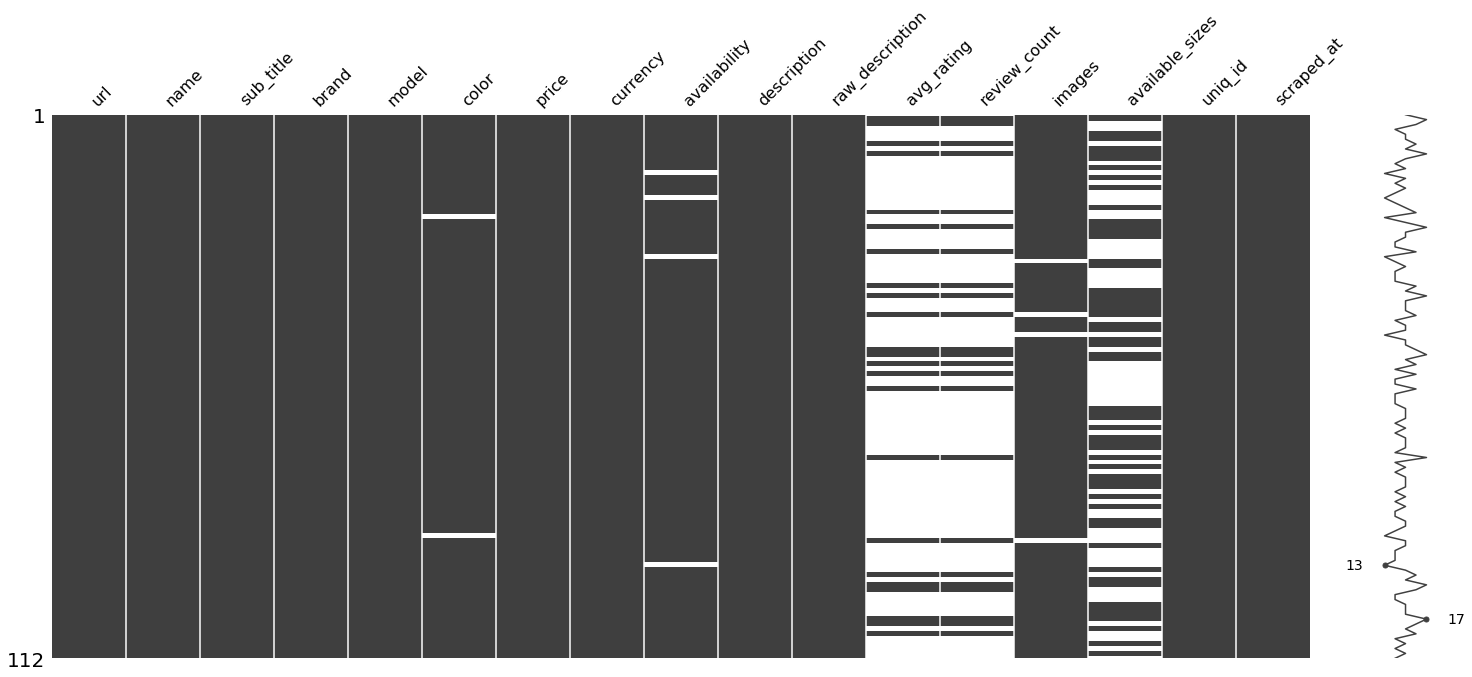

In [102]:
msno.matrix(nike)

From the graph above, it can be seen that the pattern of missing feature avg_rating is the same as feature review_count, with 79,48% of missing values. For complete missing values:

In [103]:
# Handling missing value
# For avg_rating and review_count features there are 89% of missing value
# We will focus our analysis with products with rating

nike_filter1= nike_filter1[nike_filter1['avg_rating'].isnull()==False]
len(nike_filter1)

23

From deleting nike product we get 23 remain data 


In [104]:
# Recheck again info_detail
info_detail(nike_filter1)

,dataFeatures,dataType,null,nullPct,unique,sampleVal
0,name,object,0,0.00,20,[Kristaps Porziņģis Knicks Icon Edition]
1,sub_title,object,0,0.00,21,[Women's Replica Baseball Jersey]
2,color,object,0,0.00,18,[Midnight Navy]
3,price,float64,0,0.00,20,[69.97]
4,availability,object,0,0.00,2,[OutOfStock]
5,description,object,0,0.00,23,[COORDINATED SEPARATES FOR FUN.The Nike Set in...
6,avg_rating,float64,0,0.00,7,[4.8]
7,review_count,float64,0,0.00,11,[1.0]
8,available_sizes,object,14,60.87,9,[S (4–6) | M (8–10) | L (12–14) | XL (16–18) |...
9,scraped_at,object,0,0.00,23,[20/09/2022 23:48:13]


Notice there is missing value from feature available_size that beacause the availability is outofstock, or because the product dont have any size.

### Create New Feature: Category

In [105]:
# resetting index 
nike_filter1.reset_index(drop=True, inplace=True)

In [106]:
# Create new feature 'Category'

nike_filter1['Category'] = nike_filter1['sub_title']

for i in range(0,len(nike_filter1)):
    temp = 'Other'
    
    if 'shoes' in nike_filter1.at[i,'sub_title'].lower() or 'boot' in nike_filter1.at[i,'sub_title'].lower():
        temp = 'Footwear'
    elif 't-shirt' in nike_filter1.at[i,'sub_title'].lower() or 'jersey' in nike_filter1.at[i,'sub_title'].lower() or 'overalls' in nike_filter1.at[i,'sub_title'].lower() or 'tights' in nike_filter1.at[i,'sub_title'].lower() or 'leggings' in nike_filter1.at[i,'sub_title'].lower():
        temp = 'Clothes'
    else:
        temp = temp
    
    nike_filter1.at[i,'Category'] =  temp

#nike_filter1['sub_title'].iloc[0]

In [107]:
nike_filter1.head(3)

,name,sub_title,color,price,availability,description,avg_rating,review_count,available_sizes,scraped_at,Category
0,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,Black/Black,90.00,InStock,"Inspired by traditional soccer jerseys, the Cl...",5.0,1.0,L (12–14),20/09/2022 23:32:40,Clothes
1,Nike Sportswear Swoosh,Men's Overalls,Black/White,140.00,OutOfStock,WORKING HARD TO KEEP YOU COMFORTABLE.The Nike ...,4.9,11.0,NaN,20/09/2022 23:33:16,Clothes
2,Kristaps Porziņģis Knicks Icon Edition,Nike NBA Swingman Jersey,Rush Blue,104.99,OutOfStock,THE HEART OF YOUR TEAM'S IDENTITY.The Icon Edi...,5.0,3.0,NaN,20/09/2022 23:33:38,Clothes


## Part 3: Analysis Data 

### Most review products 

In [108]:
nike_filter1.sort_values(by='review_count', ascending=False)[:5]

,name,sub_title,color,price,availability,description,avg_rating,review_count,available_sizes,scraped_at,Category
13,Nike Essential,Ball Pump,Black/Black/White,12.00,InStock,A MUST-HAVE WHEN YOU'RE ON THE GO.The Nike Ess...,4.7,316.0,NaN,20/09/2022 23:44:24,Other
10,Nike Pro,Men's Tights,White/Black,24.97,OutOfStock,LAYER IN SUPPORTIVE STRETCH.The Nike Pro Tight...,4.3,152.0,NaN,20/09/2022 23:43:39,Clothes
5,Air Jordan 1 Zoom CMFT,Shoes,Fossil Stone/Fossil Rose/Psychic Purple/White,150.00,InStock,A CLASSIC RECRAFTED FOR COMFORT.Making iconic ...,4.8,120.0,M 9 / W 10.5 | M 9.5 / W 11 | M 10 / W 11.5 | ...,20/09/2022 23:37:26,Footwear
9,Nike Air Max 90 SE,Men's Shoes,Black/Scream Green/Summit White/Obsidian,119.97,InStock,COMFORT AND HERITAGE.Max Air changed the game ...,4.8,31.0,6 | 6.5 | 7 | 7.5 | 8 | 8.5 | 9 | 10,20/09/2022 23:42:42,Footwear
11,Nike SFB Gen 2 8”,Tactical Boot,Black/Black/Black,140.00,InStock,SECOND GENERATION PROTECTION.Made with durable...,3.8,28.0,M 6 / W 7.5 | M 6.5 / W 8 | M 7 / W 8.5 | M 7....,20/09/2022 23:43:48,Footwear


### Product with best avg_rating 

to get best avg_rating we ignore data with only one review to make it look more valid

In [109]:
nike_filter1[nike_filter1['review_count']>1].sort_values(by='avg_rating', ascending=False)[:5]

,name,sub_title,color,price,availability,description,avg_rating,review_count,available_sizes,scraped_at,Category
2,Kristaps Porziņģis Knicks Icon Edition,Nike NBA Swingman Jersey,Rush Blue,104.99,OutOfStock,THE HEART OF YOUR TEAM'S IDENTITY.The Icon Edi...,5.0,3.0,NaN,20/09/2022 23:33:38,Clothes
22,Nike Sportswear,Toddler T-Shirt and Shorts Set,Multi-Color,32.97,OutOfStock,COMFORT FROM TOP TO BOTTOM.The Nike Set includ...,5.0,3.0,NaN,20/09/2022 23:52:31,Clothes
1,Nike Sportswear Swoosh,Men's Overalls,Black/White,140.00,OutOfStock,WORKING HARD TO KEEP YOU COMFORTABLE.The Nike ...,4.9,11.0,NaN,20/09/2022 23:33:16,Clothes
5,Air Jordan 1 Zoom CMFT,Shoes,Fossil Stone/Fossil Rose/Psychic Purple/White,150.00,InStock,A CLASSIC RECRAFTED FOR COMFORT.Making iconic ...,4.8,120.0,M 9 / W 10.5 | M 9.5 / W 11 | M 10 / W 11.5 | ...,20/09/2022 23:37:26,Footwear
9,Nike Air Max 90 SE,Men's Shoes,Black/Scream Green/Summit White/Obsidian,119.97,InStock,COMFORT AND HERITAGE.Max Air changed the game ...,4.8,31.0,6 | 6.5 | 7 | 7.5 | 8 | 8.5 | 9 | 10,20/09/2022 23:42:42,Footwear


### Product Analysis by Category 

In [110]:
nike_filter1['Category'].value_counts()

Clothes     11
Other        6
Footwear     6
Name: Category, dtype: int64

In [111]:
nike_filter1.groupby(by='Category').mean()

,price,avg_rating,review_count
Category,,,
Clothes,60.800909,4.881818,16.818182
Footwear,118.146667,4.616667,32.000000
Other,32.151667,4.733333,57.500000


As seen above, `clothes` is the product category that sells the most and has the best average rating, while the `other` category have the most number of reviews. Footwear have the highest average price, but have the lowest rating among them. Even so, the average products rating is very good (above 4.5)

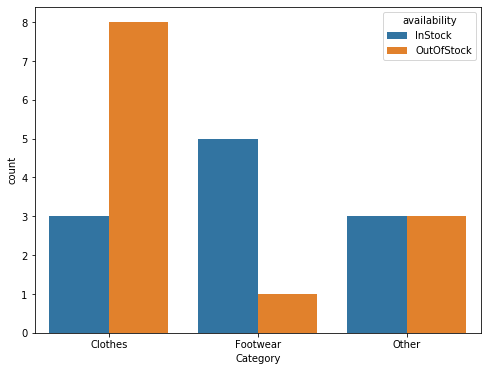

In [112]:
# Bar chart of availability
plt.figure(figsize=(8,6))
sns.countplot(data= nike_filter1, x='Category', hue='availability')

From the graph above, it can be seen that many products in the `Clothes` category are out of stock, in contrast to products in the `footwear` category that have remaining stock, this indicates the need for more marketing for products in the `footwear` category and more product stock in the `Clothes` category.